In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("C:\\Users\\india\\Downloads\\spam.csv", encoding="latin-1")

In [6]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [8]:
df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace= True)

In [9]:
df.columns = ["label", "text"]
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [11]:
df['text'].value_counts()

text
Sorry, I'll call later                                                                                                                                                 30
I cant pick the phone right now. Pls send a message                                                                                                                    12
Ok...                                                                                                                                                                  10
Your opinion about me? 1. Over 2. Jada 3. Kusruthi 4. Lovable 5. Silent 6. Spl character 7. Not matured 8. Stylish 9. Simple Pls reply..                                4
Say this slowly.? GOD,I LOVE YOU &amp; I NEED YOU,CLEAN MY HEART WITH YOUR BLOOD.Send this to Ten special people &amp; u c miracle tomorrow, do it,pls,pls do it...     4
                                                                                                                                                 

In [12]:
naa= pd.DataFrame(df['text'].value_counts().unique())
naa

,0
0,30
1,12
2,10
3,4
4,3
5,2
6,1


In [13]:
haa = pd.DataFrame(df['text'].unique())
haa

,0
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."
...,...
5164,This is the 2nd time we have tried 2 contact u...
5165,Will Ì_ b going to esplanade fr home?
5166,"Pity, * was in mood for that. So...any other s..."
5167,The guy did some bitching but I acted like i'd...


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 600x400 with 0 Axes>

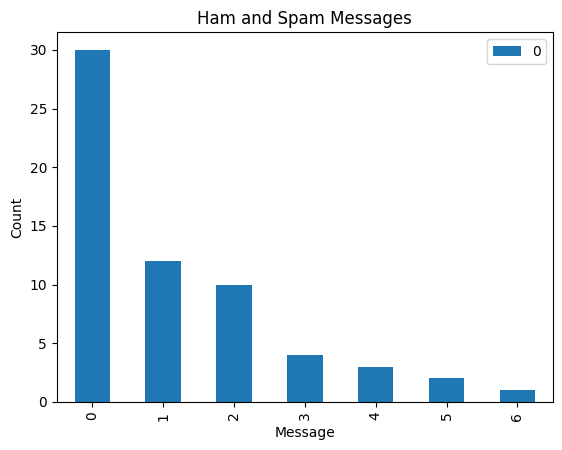

In [17]:
plt.figure(figsize=(6, 4))
naa.plot(kind='bar')
plt.title("Ham and Spam Messages")
plt.xlabel("Message")
plt.ylabel("Count")
plt.show()
# color=["Red", "Orange", "Yellow", "Green", "Blue", "purple"]

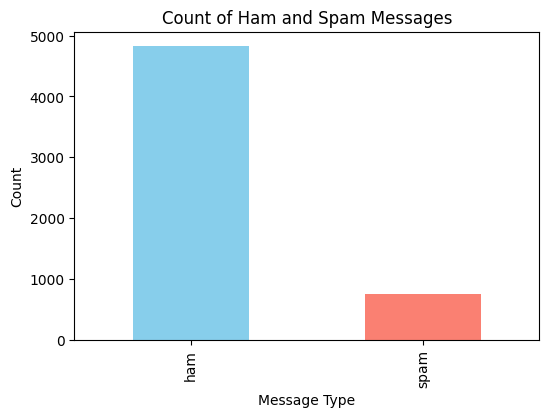

In [18]:
plt.figure(figsize=(6, 4))
df['label'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Count of Ham and Spam Messages")
plt.xlabel("Message Type")
plt.ylabel("Count")
plt.show()

In [19]:
new_df = df.copy()

In [20]:
new_df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
import string
import re
from nltk.corpus import stopwords

# Download stopwords first time
import nltk
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

# Read the file
# df = pd.read_csv("spam.csv", encoding="latin-1")

# Define clean function
def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Remove numbers
    text = re.sub(r"\d+", "", text)
    # Remove extra spaces
    text = re.sub(r"\s+", " ", text).strip()
    # Remove stopwords
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

# Apply to a specific column (e.g., 'message')
new_df["text"] = new_df["text"].apply(clean_text)

# Apply cleaning
new_df['clean_text'] = new_df['text'].apply(clean_text)

new_df.sample(10)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\india\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,label,text,clean_text
1195,spam,new voicemail please call,new voicemail please call
4031,ham,im happy babe woo hoo party dude,im happy babe woo hoo party dude
717,ham,book lesson msg call work sth im going get spe...,book lesson msg call work sth im going get spe...
4215,ham,er mw im filled tuth aight,er mw im filled tuth aight
1953,ham,eat shit wait ur monkey face bitch u asshole,eat shit wait ur monkey face bitch u asshole
3420,spam,welcome please reply age gender begin eg,welcome please reply age gender begin eg
3187,spam,nd time tried contact u u pound prize claim ea...,nd time tried contact u u pound prize claim ea...
461,ham,great never better day gives even reasons than...,great never better day gives even reasons than...
4658,ham,cant pick phone right pls send message,cant pick phone right pls send message
1635,ham,come life brought sun shiny warming heart putt...,come life brought sun shiny warming heart putt...


C:\Users\india\AppData\Local\Temp\ipykernel_8348\670875583.py:7: UserWarning: Glyph 128221 (\N{MEMO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\india\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128221 (\N{MEMO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


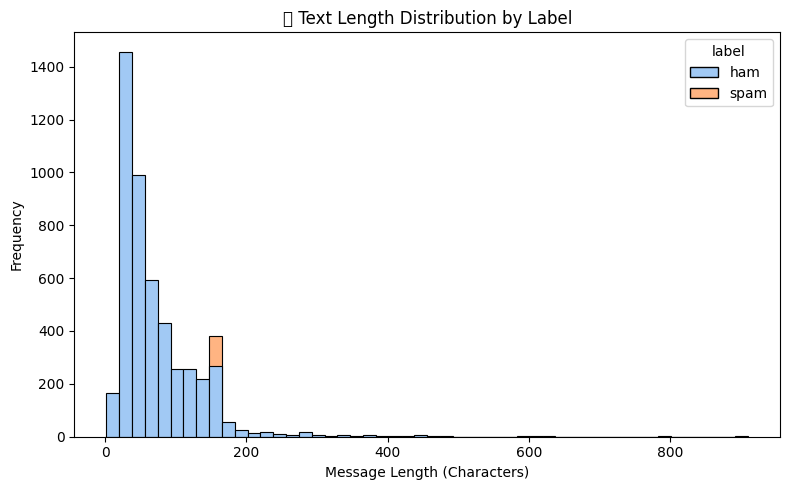

In [22]:

new_df['text_length'] = df['text'].apply(len)
plt.figure(figsize=(8, 5))
sns.histplot(data=new_df, x='text_length', hue='label', bins=50, kde=False, palette='pastel', alpha= 1)
plt.title("📝 Text Length Distribution by Label")
plt.xlabel("Message Length (Characters)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [23]:
new = df.copy()

In [24]:
# Define stopwords manually
stop_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 
'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 
'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 
'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves',
'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing',
'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 
'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 
'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 
'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 
'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 
's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y',
'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 
'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn',
"mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 
'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]


# Clean function
def clean_text(text):
    if type(text) != str:  # Skip non-string data
        return ""
    # Lowercase
    text = text.lower()
    # Remove punctuation
    for p in string.punctuation:
        text = text.replace(p, "")
    # Remove numbers
    for num in "0123456789":
        text = text.replace(num, "")
    # Remove stopwords
    words = text.split()
    words = [word for word in words if word not in stop_words]
    # Join back into a single string
    return " ".join(words)

# Apply cleaning to specific column (change 'message' to your column name)
new["text"] = new["text"].apply(clean_text)

# Apply cleaning
new['clean_text'] = new['text'].apply(clean_text)

# Preview cleaned data
new.head()


,label,text,clean_text
0,ham,go jurong point crazy available bugis n great ...,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,free entry wkly comp win fa cup final tkts st ...,free entry wkly comp win fa cup final tkts st ...
3,ham,u dun say early hor u c already say,u dun say early hor u c already say
4,ham,nah dont think goes usf lives around though,nah dont think goes usf lives around though


In [39]:
new['label'].map({'ham': 0, 'spam': 1})

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: label, Length: 5572, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Features and target
X = new['clean_text']
y = new['label'] # Convert labels to 0 and 1
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize classifiers with consistent naming
clf_lr = LogisticRegression(max_iter=1000, random_state=42)
clf_nb = MultinomialNB()
clf_rf = RandomForestClassifier(random_state=42)

# Fit models
clf_lr.fit(X_train_tfidf, y_train)
clf_nb.fit(X_train_tfidf, y_train)
clf_rf.fit(X_train_tfidf, y_train)

# Predict
y_pred_lr = clf_lr.predict(X_test_tfidf)
y_pred_nb = clf_nb.predict(X_test_tfidf)
y_pred_rf = clf_rf.predict(X_test_tfidf)


In [28]:
print("📌 Logistic Regression:\n" + "-"*40)
print(classification_report(y_test, y_pred_lr, target_names=['Ham', 'Spam']))

print("\n📌 Multinomial Naive Bayes:\n" + "-"*40)
print(classification_report(y_test, y_pred_nb, target_names=['Ham', 'Spam']))

print("\n📌 Random Forest:\n" + "-"*40)
print(classification_report(y_test, y_pred_rf, target_names=['Ham', 'Spam']))

📌 Logistic Regression:
----------------------------------------
              precision    recall  f1-score   support

         Ham       0.96      1.00      0.98       966
        Spam       0.99      0.72      0.84       149

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115


📌 Multinomial Naive Bayes:
----------------------------------------
              precision    recall  f1-score   support

         Ham       0.96      1.00      0.98       966
        Spam       0.99      0.73      0.84       149

    accuracy                           0.96      1115
   macro avg       0.98      0.87      0.91      1115
weighted avg       0.96      0.96      0.96      1115


📌 Random Forest:
----------------------------------------
              precision    recall  f1-score   support

         Ham       0.97      1.00      0.99       966
        Spam       0.99      0.82      0.90  

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Train Logistic Regression with class_weight
lr_balanced = LogisticRegression(class_weight='balanced', max_iter=1000)
lr_balanced.fit(X_train_tfidf, y_train)

# Predict
y_pred_balanced = lr_balanced.predict(X_test_tfidf)

# Evaluation
print("📌 Logistic Regression with class_weight='balanced'\n")
print(classification_report(y_test, y_pred_balanced, target_names=["Ham", "Spam"]))


📌 Logistic Regression with class_weight='balanced'

              precision    recall  f1-score   support

         Ham       0.99      0.98      0.98       966
        Spam       0.89      0.91      0.90       149

    accuracy                           0.97      1115
   macro avg       0.94      0.95      0.94      1115
weighted avg       0.97      0.97      0.97      1115



In [50]:
len(new["clean_text"].unique())

5074

In [49]:
len(new["label"].unique())

2

In [54]:
new.drop(columns=["text"], inplace=True)

In [59]:
new.head()

,label,clean_text
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry wkly comp win fa cup final tkts st ...
3,ham,u dun say early hor u c already say
4,ham,nah dont think goes usf lives around though


In [56]:
X.size

5572

In [ ]:
y.size

5572

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(y_test, y_pred_balanced,color='red',linewidth=3)
plt.scatter(new["label"],new["clean_text"],c=[new["label"]="blue", new["label"]="green"],cmap='winter',s=100)0
# sns.relplot(data=new, x=new["clean_text"], y=new["label"], hue=y, style="label")
plt.show()

SyntaxError: cannot assign to subscript here. Maybe you meant '==' instead of '='? (2332509365.py, line 3)